Because it takes too much time to tokenize the files, I shall only randomly selected some files from trucated data for data exploration. 

In [41]:
import os
import pandas as pd
os.chdir('/home/qc/Downloads/blueoptima/blueoptima_data/')
final_trunc_data = pd.read_csv('final_trunc_data.csv')

In [42]:
file_count_per_label = final_trunc_data.groupby('label')['text_length'].count()
file_count_per_label

label
.cs       86995
.java    119902
.py       20607
cpp       12153
Name: text_length, dtype: int64

There are approximately half java files and half other files. More C# files are selected because of their similiarity to Java. We want to test in a harsh condition

In [44]:
# select a random sample of size 5000 for every extension
import random
random.seed(10)
num = 5000
extensions = ['.java', '.cs', '.py', 'cpp']
sample_data = pd.DataFrame()
for extension in extensions:
    random_index = random.sample(range(int(file_count_per_label[extension])), num)
    sample_data = pd.concat([sample_data.reset_index(drop = True), final_trunc_data[final_trunc_data[extension] == 1].iloc[random_index, :]], axis = 0)

In [62]:
sample_data.to_csv('sample_data.csv', index = False)

A normal practice in NLP would be tokenizing strings of documents by words. However, in programming languages, non-alphabetic symbols, such as #, @, *, &, (), [] and {} can also have discriminative power.

In [45]:
def ngram_process(data, ngram = 1, filter_status = 'all'):
    import re
#     from nltk.util import ngrams
    gram = []
    for rows in data:
        if filter_status == 'alpha_only':
            tokens = [token for token in rows.split(" ") if (token != "" and token.isalpha())]
        elif filter_status == 'non_alpha':
            tokens = [token for token in rows.split(" ") if (token != "" and not token.isalpha())]
        else:
            tokens = [token for token in rows.split(" ") if token != ""]
        n_grams = zip(*[tokens[i:] for i in range(ngram)])
#         n_grams = list(ngrams(tokens, ngram))
        
#         n_grams = [re.sub("[(),']", "", str(t)) for t in n_grams]
        n_grams = [re.sub("['',]", "", str(t)[2: -2]) for t in n_grams]
        gram.append(n_grams) 
    return gram

[('{', 75014), ('=', 71312), ('}', 64835), ('==', 19341), ('+', 14682), ('null)', 13166), ('@Override', 12030), ('!=', 9042), (';', 6854), ('false;', 6300)]


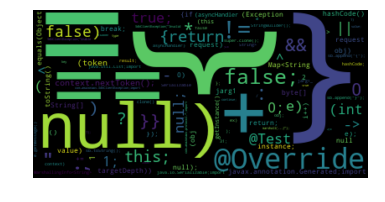

In [46]:
# non-alpha unigram for Java
unigram = ngram_process(sample_data[sample_data['.java'] == 1]['text'], filter_status = 'non_alpha')
flat_unigram_tokens = [t for sublist in unigram for t in sublist]

import nltk
frequency_unigram_tokens = nltk.FreqDist(flat_unigram_tokens)
print(sorted(frequency_unigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_unigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('public', 44688), ('return', 31119), ('if', 25479), ('new', 24189), ('String', 19626), ('void', 17894), ('final', 16750), ('static', 15561), ('private', 13280), ('int', 10641)]


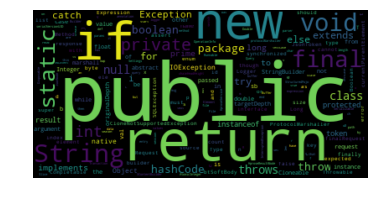

In [47]:
# word unigram for Java
unigram = ngram_process(sample_data[sample_data['.java'] == 1]['text'], filter_status='alpha_only')
flat_unigram_tokens = [t for sublist in unigram for t in sublist]

import nltk
frequency_unigram_tokens = nltk.FreqDist(flat_unigram_tokens)
print(sorted(frequency_unigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_unigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('{ =', 12372), ('} @Override', 9268), ('== null)', 8118), ('} }', 7641), ('!= null)', 4907), ('null) {', 4859), ('" +', 3452), ('} {', 3416), ('this; }', 3096), ('== false)', 2695)]


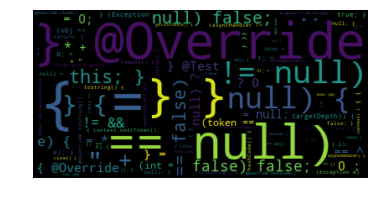

In [48]:
# non-alpha bigram for Java
bigram_alpha_java = ngram_process(sample_data[sample_data['.java'] == 1]['text'], ngram = 2, filter_status='non_alpha')
flat_bigram_tokens = [t for sublist in bigram_alpha_java for t in sublist]

import nltk
frequency_bigram_tokens = nltk.FreqDist(flat_bigram_tokens)
print(sorted(frequency_bigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_bigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('return public', 14400), ('public void', 11730), ('public String', 10100), ('String public', 7701), ('return if', 5062), ('static final', 4985), ('if return', 4775), ('if null', 4601), ('void public', 4380), ('private static', 4313)]


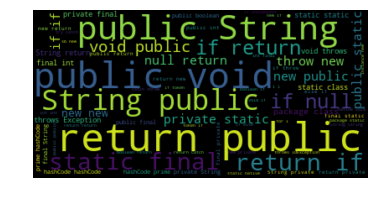

In [49]:
# word bigram for Java
bigram = ngram_process(sample_data[sample_data['.java'] == 1]['text'], ngram = 2, filter_status='alpha_only')
flat_bigram_tokens = [t for sublist in bigram for t in sublist]

import nltk
frequency_bigram_tokens = nltk.FreqDist(flat_bigram_tokens)
print(sorted(frequency_bigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_bigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('=', 172878), ('{', 138707), ('}', 122017), ('==', 24046), ('!=', 18718), ('+', 14630), ('null)', 12429), (':', 12249), ('&&', 9030), ('null;', 7574)]


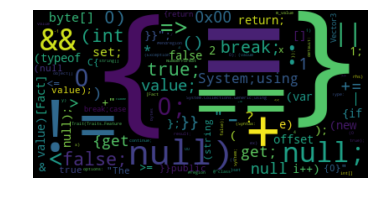

In [50]:
# non-alpha unigram for c#
unigram = ngram_process(sample_data[sample_data['.cs'] == 1]['text'], filter_status='non_alpha')
flat_unigram_tokens = [t for sublist in unigram for t in sublist]

import nltk
frequency_unigram_tokens = nltk.FreqDist(flat_unigram_tokens)
print(sorted(frequency_unigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_unigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('public', 44029), ('new', 43302), ('return', 39827), ('if', 39753), ('void', 30225), ('int', 22947), ('static', 21257), ('string', 21193), ('bool', 15707), ('var', 15488)]


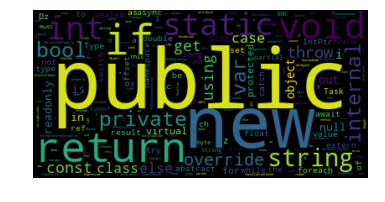

In [51]:
# word unigram for c#
unigram = ngram_process(sample_data[sample_data['.cs'] == 1]['text'], filter_status='alpha_only')
flat_unigram_tokens = [t for sublist in unigram for t in sublist]

import nltk
frequency_unigram_tokens = nltk.FreqDist(flat_unigram_tokens)
print(sorted(frequency_unigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_unigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('} }', 27425), ('{ =', 24441), ('} {', 17027), ('{ {', 11051), ('null) {', 7285), ('!= null)', 5920), ('== null)', 5726), ('= 0;', 5554), ('} =', 4413), ('{ }', 4026)]


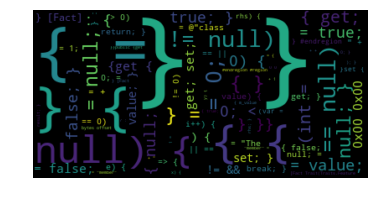

In [52]:
# non-alpha bigram for c#
bigram = ngram_process(sample_data[sample_data['.cs'] == 1]['text'], ngram = 2, filter_status = 'non_alpha')
flat_bigram_tokens = [t for sublist in bigram for t in sublist]

import nltk
frequency_bigram_tokens = nltk.FreqDist(flat_bigram_tokens)
print(sorted(frequency_bigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_bigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('return public', 8611), ('public static', 7817), ('get return', 7091), ('if return', 6385), ('public void', 6240), ('throw new', 6167), ('const string', 5627), ('using using', 5057), ('new new', 4774), ('public override', 4676)]


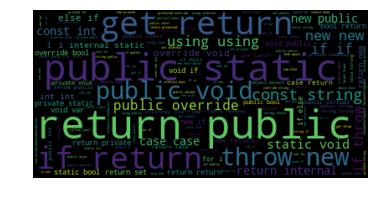

In [53]:
# word bigram for c#
bigram = ngram_process(sample_data[sample_data['.cs'] == 1]['text'], ngram = 2, filter_status='alpha_only')
flat_bigram_tokens = [t for sublist in bigram for t in sublist]

import nltk
frequency_bigram_tokens = nltk.FreqDist(flat_bigram_tokens)
print(sorted(frequency_bigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_bigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('=', 216052), ('==', 24926), ('"', 13820), (')', 12278), ('else:', 11566), ('+', 11017), ('%', 8823), ('None:', 8286), ('1', 7782), ('try:', 6676)]


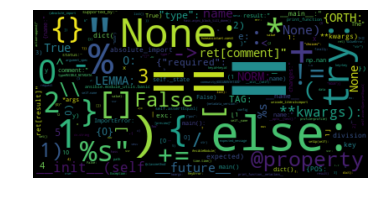

In [54]:
# non-alpha unigram for python
unigram = ngram_process(sample_data[sample_data['.py'] == 1]['text'], filter_status = 'non_alpha')
flat_unigram_tokens = [t for sublist in unigram for t in sublist]

import nltk
frequency_unigram_tokens = nltk.FreqDist(flat_unigram_tokens)
print(sorted(frequency_unigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_unigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('if', 55935), ('def', 44078), ('return', 39952), ('in', 32092), ('import', 26487), ('not', 22129), ('for', 21077), ('assert', 16767), ('is', 15137), ('with', 9879)]


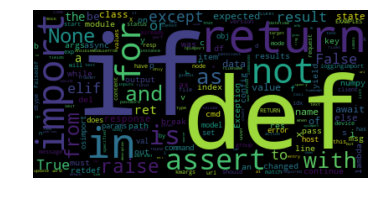

In [55]:
# word unigram for python
unigram = ngram_process(sample_data[sample_data['.py'] == 1]['text'], filter_status='alpha_only')
flat_unigram_tokens = [t for sublist in unigram for t in sublist]

import nltk
frequency_unigram_tokens = nltk.FreqDist(flat_unigram_tokens)
print(sorted(frequency_unigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_unigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('= =', 3821), ('= []', 3712), ('= {', 2892), ('= {}', 2840), ('else: =', 2779), ('%s" %', 2279), ('try: =', 2262), ('None: =', 2130), (') =', 1780), ('ret[comment]" =', 1608)]


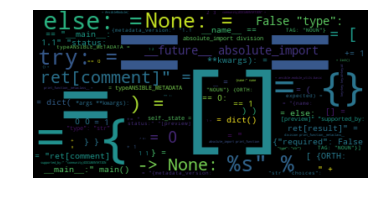

In [56]:
# non-alpha bigram for python
bigram = ngram_process(sample_data[sample_data['.py'] == 1]['text'], ngram = 2, filter_status='non_alpha')
flat_bigram_tokens = [t for sublist in bigram for t in sublist]

import nltk
frequency_bigram_tokens = nltk.FreqDist(flat_bigram_tokens)
print(sorted(frequency_bigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_bigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('if not', 8996), ('return def', 8894), ('in if', 7498), ('def return', 7424), ('def if', 6097), ('from import', 5532), ('assert assert', 5436), ('is not', 5357), ('import import', 4608), ('if is', 4555)]


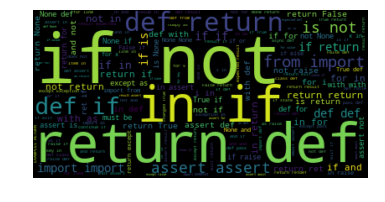

In [57]:
# word bigram for python
bigram = ngram_process(sample_data[sample_data['.py'] == 1]['text'], ngram = 2, filter_status='alpha_only')
flat_bigram_tokens = [t for sublist in bigram for t in sublist]

import nltk
frequency_bigram_tokens = nltk.FreqDist(flat_bigram_tokens)
print(sorted(frequency_bigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_bigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('=', 209932), ('{', 86009), ('}', 60293), ('==', 36338), ('<<', 23135), ('+', 21450), (')', 19956), ('0', 19196), ('<', 18608), ('0;', 16903)]


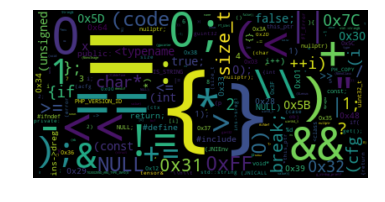

In [58]:
# non-alpha unigram for c++
unigram = ngram_process(sample_data[sample_data['cpp'] == 1]['text'], filter_status='non_alpha')
flat_unigram_tokens = [t for sublist in unigram for t in sublist]

import nltk
frequency_unigram_tokens = nltk.FreqDist(flat_unigram_tokens)
print(sorted(frequency_unigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_unigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('if', 37040), ('const', 35142), ('return', 31361), ('int', 24684), ('void', 22789), ('else', 15349), ('i', 12045), ('for', 9212), ('char', 8424), ('bool', 8026)]


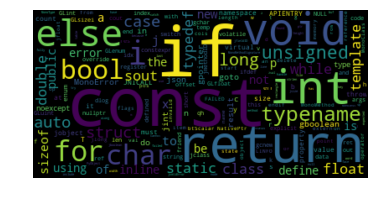

In [59]:
# word unigram for c++
unigram = ngram_process(sample_data[sample_data['cpp'] == 1]['text'], filter_status='alpha_only')
flat_unigram_tokens = [t for sublist in unigram for t in sublist]

import nltk
frequency_unigram_tokens = nltk.FreqDist(flat_unigram_tokens)
print(sorted(frequency_unigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_unigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('= 0;', 14745), ('} }', 8238), (') {', 8152), ('{ =', 7843), ('0; <', 6997), ('} {', 6381), ('0xFF 0xFF', 6043), ('" <<', 3482), ('(i =', 3071), ('0 0', 2789)]


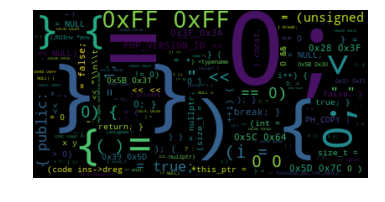

In [60]:
# non-alpha bigram for c++
bigram = ngram_process(sample_data[sample_data['cpp'] == 1]['text'], ngram = 2, filter_status = 'non_alpha')
flat_bigram_tokens = [t for sublist in bigram for t in sublist]

import nltk
frequency_bigram_tokens = nltk.FreqDist(flat_bigram_tokens)
print(sorted(frequency_bigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_bigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

[('const const', 8106), ('int int', 7916), ('if if', 6221), ('if return', 5782), ('else if', 5382), ('return return', 4635), ('const return', 4252), ('i i', 4135), ('if else', 4064), ('sout sout', 3693)]


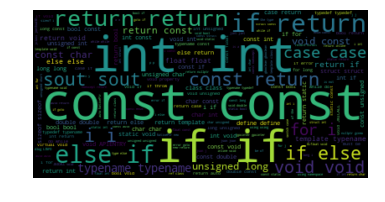

In [61]:
# word bigram for c++
bigram = ngram_process(sample_data[sample_data['cpp'] == 1]['text'], ngram = 2, filter_status = 'alpha_only')
flat_bigram_tokens = [t for sublist in bigram for t in sublist]

import nltk
frequency_bigram_tokens = nltk.FreqDist(flat_bigram_tokens)
print(sorted(frequency_bigram_tokens.items(),key=lambda w: w[1], reverse=True)[:10])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_bigram_tokens)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

As we can see, the Tnon-alphabetical bigram are not very powerful discriminators. The following modelling analysis should exclude the non-alphabetical bigram.

In [59]:
def user_fit(docs):
    import numpy as np
    from scipy.sparse import csr_matrix 
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}

    for d in docs:
        for term in d:
            index = vocabulary.setdefault(term, len(vocabulary))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype = np.int64)

In [60]:
from sklearn.model_selection import train_test_split
X = sample_data['text'] 
y = sample_data['.java']
indices = range(X.shape[0])
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(X, y, indices, test_size=0.33, random_state=53)

In [61]:
# I have used only non-alpha
unigram_vectorizer = user_fit(ngram_process(X, filter_status = 'non_alpha'))

user_count_train = unigram_vectorizer[train_index, :]
user_count_test = unigram_vectorizer[test_index, :]

# unigram
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(user_count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(user_count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

0.9625757575757575
[[4729  213]
 [  34 1624]]


[0.8840500816548721, 0.9794933655006032]

In [62]:
# unigram
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(nb_classifier, user_count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

[0.8885847248836573, 0.9712746858168761]

In [63]:
# I have used only alphabetic word
unigram_vectorizer = user_fit(ngram_process(X, filter_status = 'alpha_only'))

user_count_train = unigram_vectorizer[train_index, :]
user_count_test = unigram_vectorizer[test_index, :]

# unigram
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(user_count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(user_count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

0.9793939393939394
[[4828  114]
 [  22 1636]]


[0.9348571428571428, 0.9867310012062727]

In [64]:
# unigram
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(nb_classifier, user_count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

[0.9312977099236641, 0.9856373429084381]

In [65]:
# I have inlcuded all unigrams
unigram_vectorizer = user_fit(ngram_process(X))

user_count_train = unigram_vectorizer[train_index, :]
user_count_test = unigram_vectorizer[test_index, :]

# unigram
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(user_count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(user_count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

0.9839393939393939
[[4860   82]
 [  24 1634]]


[0.9522144522144522, 0.985524728588661]

In [66]:
# unigram
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(nb_classifier, user_count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

[0.9553284671532847, 0.9790544584081389]

In [73]:
# inluding both word unigram and bigram
import scipy
bigram_vectorizer = user_fit(ngram_process(X, ngram = 2, filter_status = 'alpha_only'))
user_count = scipy.sparse.hstack((unigram_vectorizer, bigram_vectorizer)).tocsr()

user_count_train = user_count[train_index,:]
user_count_test = user_count[test_index, :]

# unigram and bigram
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score


# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(user_count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(user_count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# # Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

0.9868181818181818
[[4869   73]
 [  14 1644]]


[0.9574839836924869, 0.991556091676719]

In [74]:
# unigram and bigram
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(nb_classifier, user_count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

[0.9578488372093024, 0.985936564931179]

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

count_vectorizer = CountVectorizer(analyzer= 'word')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# unigram
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

0.9951515151515151
[[4926   16]
 [  16 1642]]


[0.9903498190591074, 0.9903498190591074]

In [76]:
# unigram
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(nb_classifier, count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

[0.9464387464387465, 0.9940155595451825]

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

count_vectorizer = CountVectorizer(analyzer= 'word', ngram_range=[1, 2])
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# unigram
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

0.9972727272727273
[[4939    3]
 [  15 1643]]


[0.9981773997569866, 0.9909529553679132]

In [78]:
# unigram
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(nb_classifier, count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

[0.9538549727715678, 0.9958108916816277]

In [4]:
# Using full data set now.
# final_data = pd.read_csv('final_data.csv')
final_data = final_data.fillna('')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

X = final_data['text'] 
y = final_data['.java']
indices = range(X.shape[0])
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(X, y, indices, test_size=0.33, random_state=53)

count_vectorizer = CountVectorizer(analyzer= 'word')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

0.9910569599740723
[[51315   783]
 [  100 46538]]


[0.9834534350499778, 0.9978558257215147]

In [6]:
# unigram
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(nb_classifier, count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

[0.9825853360024063, 0.9977461347263765]

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Instantiate a random forest classifier: rf_classifier
rf_classifier = RandomForestClassifier(random_state=53)

rf_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = rf_classifier.predict(count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

/home/qc/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9986327175498299
[[52084    14]
 [  121 46517]]


[0.9996991253143066, 0.9974055491230327]

In [22]:
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(rf_classifier, count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

[0.999937624750499, 0.9978711749620297]

In [19]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Instantiate a support vector machine classifier: svm_classifier
svm_classifier = SVC(random_state=53, gamma='scale')

svm_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = svm_classifier.predict(count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

0.9928617371454516
[[39642    73]
 [  493 39083]]


[0.998135662478292, 0.9875429553264605]

In [ ]:
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(svm_classifier, count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Instantiate a logistic classifier: lr_classifier
lr_classifier = LogisticRegression(random_state=53)

lr_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = lr_classifier.predict(count_test)
 
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
print(cm)

[precision_score(y_test, pred), recall_score(y_test, pred)]

/home/qc/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/qc/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9990288935692575
[[39696    19]
 [   58 39518]]


[0.9995194374889345, 0.9985344653325248]

In [24]:
from sklearn.model_selection import cross_val_predict
cross_pred =cross_val_predict(lr_classifier, count_train, y_train, cv = 10)
[precision_score(y_train, cross_pred), recall_score(y_train, cross_pred)]

/home/qc/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/qc/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.9990535963339311, 0.9987799716156661]

In [8]:
import nltk
# nltk.download('punkt')

In [140]:
from selenium import webdriver
import git
drive = webdriver.Firefox(executable_path = r'/home/qc/Downloads/geckodriver')
drive.get('https://github.com/search?l=Java&q=code&type=Code')

I need to separate the above block from the rest because I need to sign in

In [141]:
def web_code_retrieve(repo_url, num_pages):
    from selenium import webdriver
#     import urllib
    from urllib.request import urlopen
#     from contextlib import closing
    hrefs = []
    code_text = []
    for num_page in range(num_pages):
        Xpaths = drive.find_elements_by_xpath('//*[contains(concat( " ", @class, " " ), concat( " ", "col-10", " " ))]')
        for Xpath in Xpaths:
            url = Xpath.find_elements_by_tag_name('a')[1].get_attribute('href')
            url = re.sub('/blob/', '/', url)
            url = re.sub('github.com', 'raw.githubusercontent.com', url)
            code_text.append(urlopen(url).read())
            hrefs.append(url)
        drive.find_element_by_link_text('Next').click()
        drive.get(drive.current_url)
    return [hrefs, code_text]

In [139]:
result = web_code_retrieve('https://github.com/search?l=Java&q=java&type=Code', 1000)

NoSuchElementException: Message: Unable to locate element: Next
